In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset into the notebook

data = pd.read_csv("lms-Copy1.csv")
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
0,16,18,1,4,4,3,104,37,5,19,5.0,2.94,8,0,0.00,15.94
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,441,4,0,0,0,0,1,0,0,12,0.0,0.00,0,0,0.00,0.00
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [3]:
# Removing rows that contain 0 in the final_exam score

data = data[data['final_exam'] != 0]
data

,user_id,assignments_viewed,assignments_submitted,quiz_started,quiz_submitted,quiz_reviewed,quiz_viewed,forums_viewed,page_views,resources_viewed,quiz_1,quiz_2,assignment,project,final_exam,total_score
1,17,52,2,3,3,2,125,50,10,6,4.0,3.82,6,20,37.67,71.49
2,18,134,4,3,2,1,170,289,37,61,3.5,2.21,5,14,26.67,51.37
3,19,134,3,3,3,2,139,30,0,30,4.0,2.30,5,14,31.17,56.47
4,20,38,2,3,3,12,142,35,12,12,3.0,3.82,10,20,35.33,72.16
5,21,11,0,2,2,2,95,11,0,3,2.0,0.00,0,0,30.50,32.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,438,17,1,2,2,8,86,14,0,29,0.0,4.12,0,19,34.67,57.78
226,449,69,2,2,2,2,60,0,0,6,4.5,1.18,5,8,32.67,51.34
227,450,37,2,2,2,1,46,3,1,36,5.0,4.12,7,15,26.50,57.62
228,451,68,1,1,1,0,66,79,7,26,0.0,2.40,2,0,44.00,48.40


In [4]:
# Splitting data into features and target variable

X = data[['assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed','quiz_1','quiz_2','assignment','project']]
y = data['final_exam']  # Target variable

In [5]:
# Splitting the dataset into testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predictions
y_pred = rf_model.predict(X_test)

In [8]:
# Calculate feature importances

features = ('assignments_viewed', 'assignments_submitted', 'quiz_started', 'quiz_submitted', 
          'quiz_reviewed', 'quiz_viewed', 'forums_viewed', 'page_views', 'resources_viewed','quiz_1','quiz_2','assignment','project')
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
print("Feature Importance:", feature_importances)

Feature Importance: assignments_viewed       0.061816
assignments_submitted    0.029742
quiz_started             0.016652
quiz_submitted           0.014599
quiz_reviewed            0.046869
quiz_viewed              0.189742
forums_viewed            0.101649
page_views               0.032644
resources_viewed         0.095988
quiz_1                   0.041082
quiz_2                   0.207533
assignment               0.050416
project                  0.111267
dtype: float64


In [9]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root mean squared error
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 5.2651576923076915
Mean Squared Error: 51.04675079884613
Root Mean Squared Error: 7.1447008893897115
R-squared: -0.08719267743500714


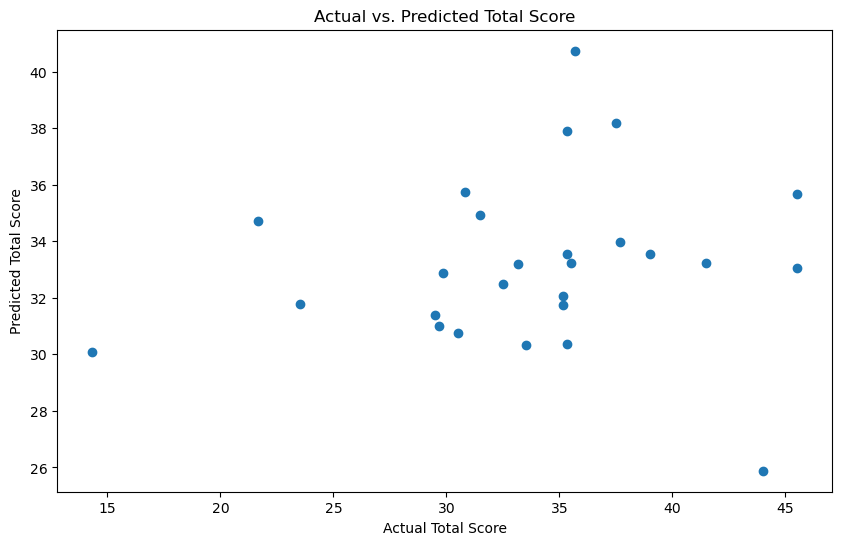

In [10]:
# Visualize predicted vs. actual scores
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs. Predicted Total Score")
plt.show()

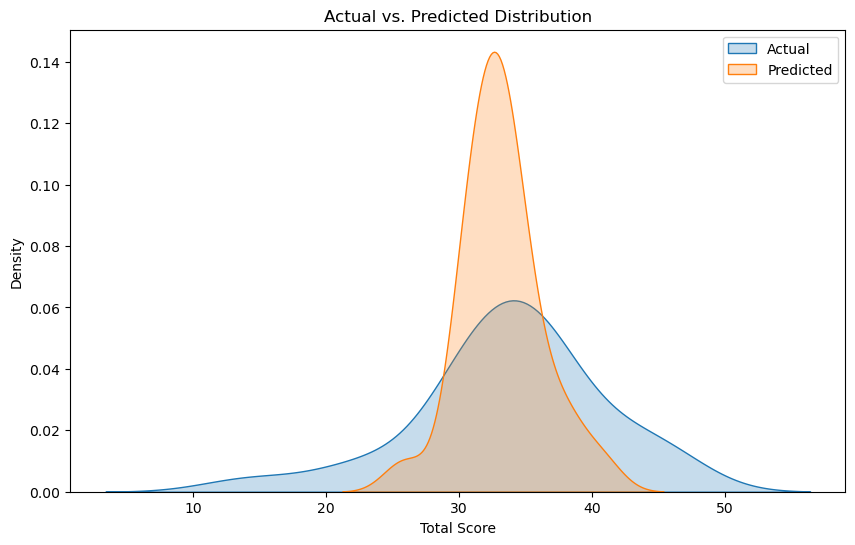

In [11]:
# Visualization: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True)
plt.xlabel('Total Score')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Distribution')
plt.legend()
plt.show()

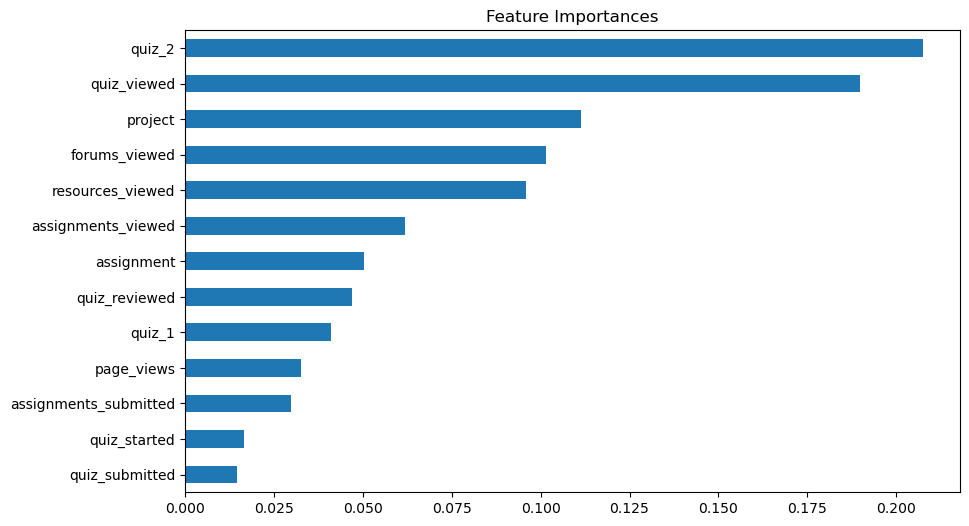

In [12]:
# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

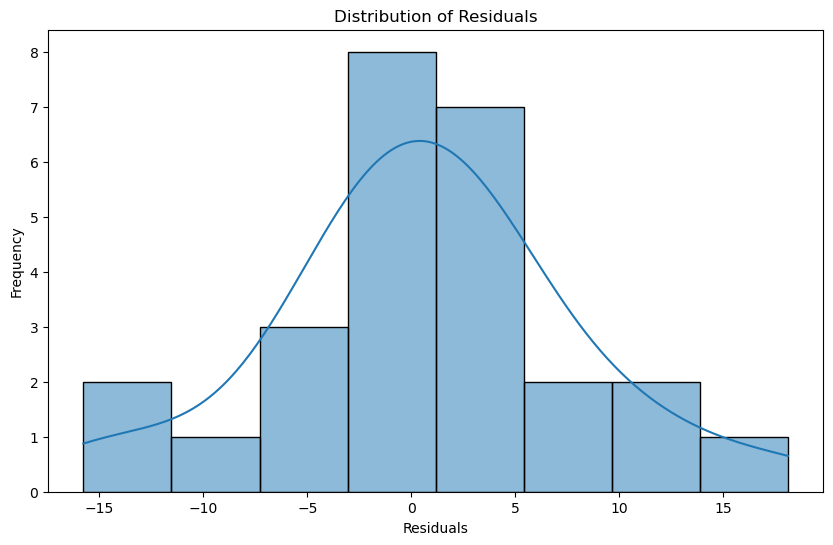

In [13]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

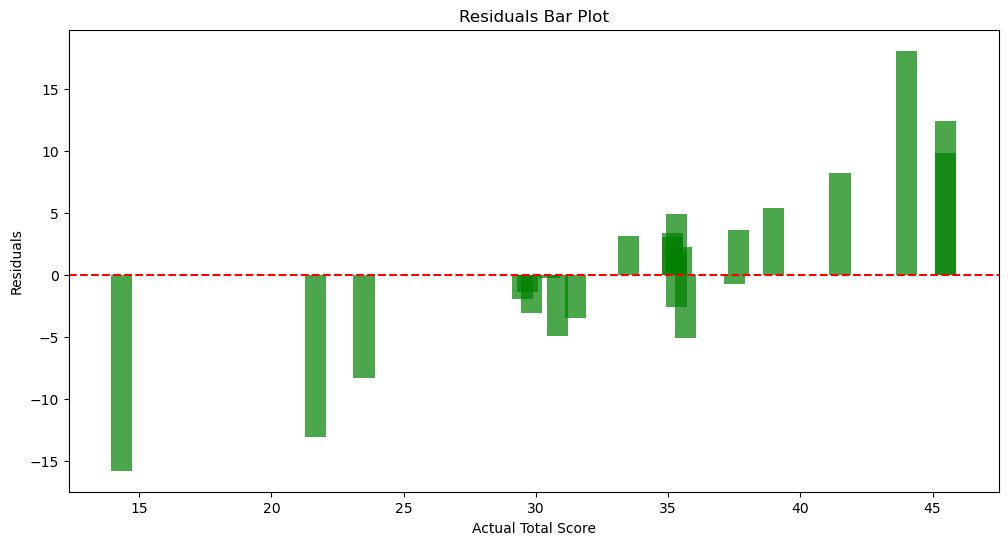

In [14]:
# Residuals bar plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.bar(y_test, residuals, color='g', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Total Score')
plt.ylabel('Residuals')
plt.title('Residuals Bar Plot')
plt.show()